# Set with Data without Normalization

# Load (Preprocessed) Data 

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# Make the data set and labels
# Create feature vector num. of samples x num. of features
# Create label vector num. of samples x 1 (bot or not)
# Load preprocessed feature vectores
X_b = np.load(open('bot_features_without_normalization.npy','rb'))
X_n = np.load(open('nonbot_features_without_normalization.npy','rb'))
# Strip the 1st row, those are labels
X_b = [ row[1:] for row in X_b ]
X_n = [ row[1:] for row in X_n ]

# Data is 75/25 split for train/test

In [44]:
# Split the data set for all classifiers first
from sklearn.model_selection import train_test_split
X_train = []
X_test = []
y_train = []
y_test = []
y_b = np.ones(len(X_b))
y_n = np.zeros(len(X_n))
mislabel = [56,63,66,194,246,328,422,458,494,518,541,544,680,684,734,818,831,855]
for i in mislabel:
    y_n[i]=1
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.25, random_state=42)
X_train.extend(X_train_b)
X_test.extend(X_test_b)
y_train.extend(y_train_b)
y_test.extend(y_test_b)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.25, random_state=24)
X_train.extend(X_train_n)
X_test.extend(X_test_n)
y_train.extend(y_train_n)
y_test.extend(y_test_n)

# Function to Plot Confusion Matrix

In [4]:
# Modified from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py 
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cm = cnf_matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=3)
    plt.show()
# plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix (Normalize) ')
class_names = ['bot', 'not-bot']

# Function to Plot ROC

In [5]:
# modified from : http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics
import matplotlib.pyplot as plt
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)
def plot_roc(y_test,y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    #plt.plot(fpr[2], tpr[2], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes for tweets
# Create a Gaussian Classifier
clf_NB = GaussianNB()
# Train the model using the training sets 
clf_NB.fit(X_train, y_train)
#Predict Output 
predicted_NB = clf_NB.predict(X_test)
y_true = y_test
y_pred = predicted_NB
print('For Gaussian Naive Bayes:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Gaussian Naive Bayes:
The accuracy is: 61.235955% 
The AUC score is: 0.632924 
The precision is: 0.549327 
The recall is: 0.976096 
The f1 score is: 0.703013 


# Decison Tree

In [6]:
# To find best Tree depth
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from math import floor
# Should test depth from 3 to num. of features
#param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':np.floor(len(y_train)*(np.arange(1,10,.5)/100))}
param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':(np.arange(.5,10,.5)/100)}
#param_grid = {'max_depth': np.arange(3, len(X_train[1])), 'min_samples_split':[5,10,12]}
clf_DT = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
clf_DT = clf_DT.fit(X_train, y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT = clf_DT.predict(X_test)
best_set = clf_DT.best_params_
y_true = y_test
y_pred = predicted_DT
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
print(best_set)

For Decision Tree:
The accuracy is: 88.389513% 
The AUC score is: 0.883251 
The precision is: 0.879518 
The recall is: 0.872510 
The f1 score is: 0.876000 
{'min_samples_split': 0.014999999999999999, 'max_depth': 8}


In [7]:
# Manual change of depth
from sklearn import tree
clf_DT1 = tree.DecisionTreeClassifier(max_depth=6)
clf_DT1 = clf_DT1.fit(X_train, y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_DT1 = clf_DT1.predict(X_test)
#best_set = clf_DT1.best_params_
y_true = y_test
y_pred = predicted_DT1
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree:
The accuracy is: 89.138577% 
The AUC score is: 0.891670 
The precision is: 0.875486 
The recall is: 0.896414 
The f1 score is: 0.885827 


# Visualize a Tree

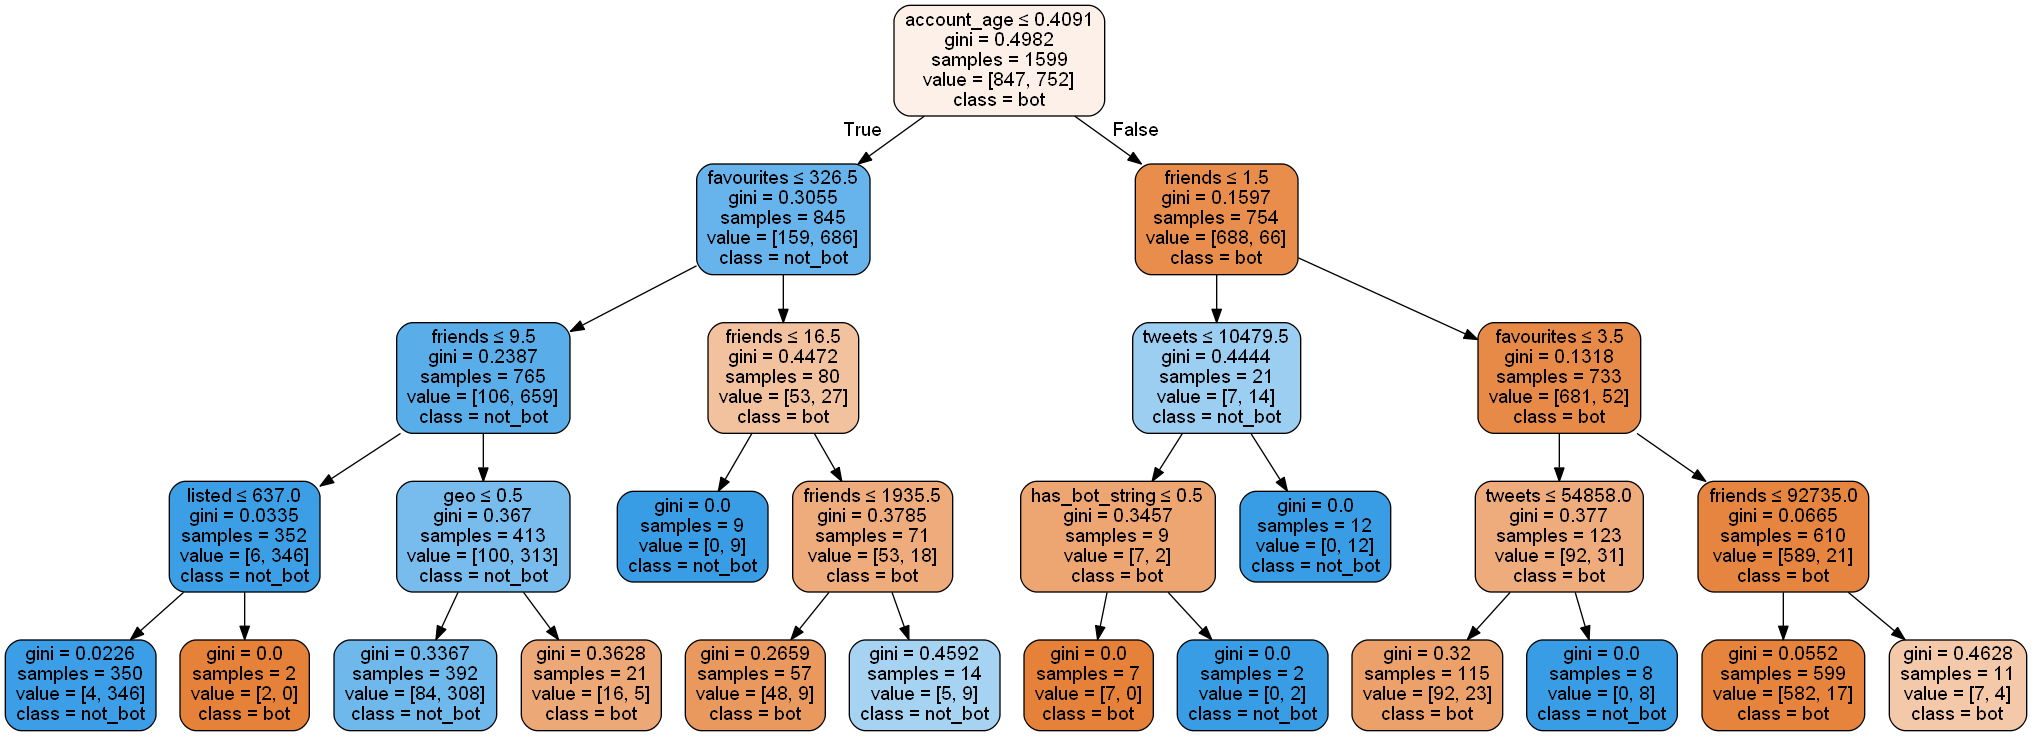

In [18]:
clf_DT2 = tree.DecisionTreeClassifier(max_depth=4)
clf_DT2 = clf_DT2.fit(X_train, y_train)
# To visualize the tree
from IPython.display import Image  
import pydotplus
names = ['has_bot_string','account_age','followers','favourites','contributors','friends','geo','has_extended_profile','is_translation_enabled','lang','location','notifications','tweets','verified','url','default_profile','default_profile_image','listed']
clss = ['bot','not_bot']
dot_data = tree.export_graphviz(clf_DT2, out_file=None, 
                     feature_names=names,  
                     class_names=clss,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# AdaBoost for Decision Tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=8))
ada = ada.fit(X_train,y_train) 
pred_ada = ada.predict(X_test)
y_true = y_test
y_pred = pred_ada
print('For Decision Tree with AdaBoost:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree with AdaBoost:
The accuracy is: 91.760300% 
The AUC score is: 0.916856 
The precision is: 0.919028 
The recall is: 0.904382 
The f1 score is: 0.911647 


In [26]:
X_val = np.load(open('test_features_without_normalization.npy','rb'))
pred_1f = np.array(ada.predict(X_val))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_adat.npy',pred_2f)


(577L, 1L)


# Random Forest

In [47]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf_RF = RandomForestClassifier()
# param_grid = {"max_depth": [np.arange(3, len(X_train[1])), None],
#               "min_samples_split": (len(y_train)*(np.arange(0,11,.5)/100)),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}
param_grid = {#"max_depth": [np.arange(3, len(X_train[1])), None],
              #"max_depth": [3,  4,  5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None],
              "min_samples_split": (np.arange(.5,10,.5)/100),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid)
grid_search_RF.fit(X_train, y_train)
predicted_RF = grid_search_RF.predict(X_test)
y_pred = predicted_RF
y_true = y_test
print('For Random Forest:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
best_set_RF = grid_search_RF.best_params_
# # Utility function to report best scores
# def report(results, n_top=10):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
# report(grid_search_RF.cv_results_)

For Random Forest:
The accuracy is: 91.760300% 
The AUC score is: 0.917130 
The precision is: 0.924603 
The recall is: 0.903101 
The f1 score is: 0.913725 


Confusion matrix, without normalization
[[257  26]
 [ 27 224]]


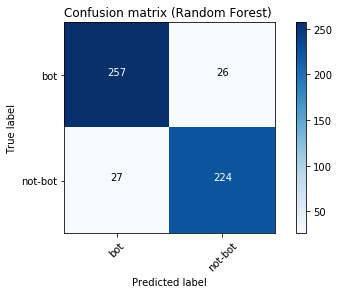

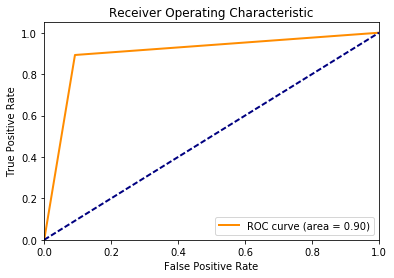

In [37]:
plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix (Random Forest) ')
plot_roc(y_test,y_pred)

In [48]:
X_val = np.load(open('test_features_without_normalization.npy','rb'))
pred_1f = np.array(grid_search_RF.predict(X_val))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_RFt9.npy',pred_2f)
#96.516%%

(577L, 1L)


In [27]:
from sklearn.ensemble import RandomForestClassifier
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)
clf_RFl = RandomForestClassifier(n_estimators=18)
clf_RFl = clf_RFl.fit(X_train2[:,[0,1,2,6,13,15]], y_train)
#predicted_DT = clf_DT.predict_proba(xtest)[:, 1]
predicted_RFl = clf_RFl.predict(X_test2[:,[0,1,2,6,13,15]])
#best_set = clf_DT1.best_params_
y_true = y_test
y_pred = predicted_RFl
print('For Decision Tree:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))

For Decision Tree:
The accuracy is: 84.082397% 
The AUC score is: 0.841489 
The precision is: 0.816794 
The recall is: 0.852590 
The f1 score is: 0.834308 


In [28]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_RFl.predict(X_val[:,[0,1,2,6,13,15]]))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_RFah.npy',pred_2f)

(577L, 1L)


In [ ]:
# Modified EnsembleSVM
# Split data per column
# And then trian multiple SVM's, 1 per feature 
# Hard vote on a label
#print(best_set_SVM)
from sklearn.svm import SVC
#best_set_SVM = C=10, kernel=linear,
# Same random state for better control
#svm1 = SVC(C=10, kernel='linear', random_state=1)
#svm2 = SVC(C=10, kernel='linear', random_state=1)
svm3 = SVC(C=10, kernel='linear', random_state=1)
# svm4 = SVC(C=10, kernel='linear', random_state=1)
# svm5 = SVC(C=10, kernel='linear', random_state=1)
# svm6 = SVC(C=10, kernel='linear', random_state=1)
# svm7 = SVC(C=10, kernel='linear', random_state=1)
# svm8 = SVC(C=10, kernel='linear', random_state=1)
# svm9 = SVC(C=10, kernel='linear', random_state=1)
# svm10 = SVC(C=10, kernel='linear', random_state=1)
# svm11 = SVC(C=10, kernel='linear', random_state=1)
# svm12 = SVC(C=10, kernel='linear', random_state=1)
# svm13 = SVC(C=10, kernel='linear', random_state=1)
# svm14 = SVC(C=10, kernel='linear', random_state=1)
# svm15 = SVC(C=10, kernel='linear', random_state=1)
# svm16 = SVC(C=10, kernel='linear', random_state=1)
# svm17 = SVC(C=10, kernel='linear', random_state=1)
# svm18 = SVC(C=10, kernel='linear', random_state=1)
X_train2 = np.array(X_train)
#svm1.fit(X_train2[:,0].reshape(-1, 1),y_train)
#svm2.fit(X_train2[:,1].reshape(-1, 1),y_train)
svm3.fit(X_train2[:,2].reshape(-1, 1),y_train)
# svm4.fit(X_train2[:,3].reshape(-1, 1),y_train)
# svm5.fit(X_train2[:,4].reshape(-1, 1),y_train)
# svm6.fit(X_train2[:,5].reshape(-1, 1),y_train)
# svm7.fit(X_train2[:,6].reshape(-1, 1),y_train)
# svm8.fit(X_train2[:,7].reshape(-1, 1),y_train)
# svm9.fit(X_train2[:,8].reshape(-1, 1),y_train)
# svm10.fit(X_train2[:,9].reshape(-1, 1),y_train)
# svm11.fit(X_train2[:,10].reshape(-1, 1),y_train)
# svm12.fit(X_train2[:,11].reshape(-1, 1),y_train)
# svm13.fit(X_train2[:,12].reshape(-1, 1),y_train)
# svm14.fit(X_train2[:,13].reshape(-1, 1),y_train)
# svm15.fit(X_train2[:,14].reshape(-1, 1),y_train)
# svm16.fit(X_train2[:,15].reshape(-1, 1),y_train)
# svm17.fit(X_train2[:,16].reshape(-1, 1),y_train)
# svm18.fit(X_train2[:,17].reshape(-1, 1),y_train)
vt = []
X_test2 = np.array(X_test)
#vt.append(svm1.predict(X_test2[:,0].reshape(-1, 1)))
#vt.append(svm2.predict(X_test2[:,1].reshape(-1, 1)))
vt.append(svm3.predict(X_test2[:,2].reshape(-1, 1)))
# vt.append(svm4.predict(X_test2[:,3].reshape(-1, 1)))
# vt.append(svm5.predict(X_test2[:,4].reshape(-1, 1)))
# vt.append(svm6.predict(X_test2[:,5].reshape(-1, 1)))
# vt.append(svm7.predict(X_test2[:,6].reshape(-1, 1)))
# vt.append(svm8.predict(X_test2[:,7].reshape(-1, 1)))
# vt.append(svm9.predict(X_test2[:,8].reshape(-1, 1)))
# vt.append(svm10.predict(X_test2[:,9].reshape(-1, 1)))
# vt.append(svm11.predict(X_test2[:,10].reshape(-1, 1)))
# vt.append(svm12.predict(X_test2[:,11].reshape(-1, 1)))
# vt.append(svm13.predict(X_test2[:,12].reshape(-1, 1)))
# vt.append(svm14.predict(X_test2[:,13].reshape(-1, 1)))
# vt.append(svm15.predict(X_test2[:,14].reshape(-1, 1)))
# vt.append(svm16.predict(X_test2[:,15].reshape(-1, 1)))
# vt.append(svm17.predict(X_test2[:,16].reshape(-1, 1)))
# vt.append(svm18.predict(X_test2[:,17].reshape(-1, 1)))
"""
vt_count = np.array(vt1)+np.array(vt2)+np.array(vt3)+np.array(vt4)+np.array(vt5)+np.array(vt6)+np.array(vt7)+np.array(vt8)+np.array(vt9)+np.array(vt10)
predicted_ES = [ vt_count[i]>=5 for i in range(0,len(vt_count)) ]
y_pred = predicted_ES
print('For Ensemble SVM:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
"""
for i in range(18):
    print('For Ensemble SVM %i:' % i)
    acc = accuracy_score(y_test, vt[i])
    print ("The accuracy is: %f%% " % ( 100*acc ))

In [42]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
X_train2 = np.array(X_train)
X_test2 = np.array(X_test)

clf_RF = RandomForestClassifier()
# param_grid = {"max_depth": [np.arange(3, len(X_train[1])), None],
#               "min_samples_split": (len(y_train)*(np.arange(0,11,.5)/100)),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]}
param_grid = {#"max_depth": [np.arange(3, len(X_train[1])), None],
              #"max_depth": [3,  4,  5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, None],
              "min_samples_split": (np.arange(.5,10,.5)/100),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid)
grid_search_RF.fit(X_train2[:,[0,1,2,6,13,15]], y_train)
predicted_RF = grid_search_RF.predict(X_test2[:,[0,1,2,6,13,15]])
y_pred = predicted_RF
y_true = y_test
print('For Random Forest:')
acc = accuracy_score(y_true, y_pred)
print ("The accuracy is: %f%% " % ( 100*acc ))
auc = (roc_auc_score(y_true, y_pred))
print ("The AUC score is: %f " %  ( auc ))
pre = metrics.precision_score(y_true, y_pred)
print ("The precision is: %f " %  ( pre ))
rec = metrics.recall_score(y_true, y_pred)
print ("The recall is: %f " %  ( rec ))
f1 = metrics.f1_score(y_true, y_pred)  
print ("The f1 score is: %f " %  ( f1 ))
best_set_RF = grid_search_RF.best_params_
# # Utility function to report best scores
# def report(results, n_top=10):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")
# report(grid_search_RF.cv_results_)

For Random Forest:
The accuracy is: 87.640449% 
The AUC score is: 0.878437 
The precision is: 0.838828 
The recall is: 0.912351 
The f1 score is: 0.874046 


In [43]:
X_val = np.load(open('test_features.npy','rb'))
pred_1f = np.array(clf_RFl.predict(X_val[:,[0,1,2,6,13,15]]))
pred_2f = []
for i in range (len(pred_1f)):
    pred_2f.append([pred_1f[i]])
pred_2f = np.array(pred_2f)
print(pred_2f.shape)
np.save('pred_RFahh.npy',pred_2f)

(577L, 1L)
